<a href="https://colab.research.google.com/github/sabinaML/Python_probability_theory_statistics/blob/main/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F%20%D0%B8%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задача 1.
Вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задача 2.
Вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

#https://drive.google.com/file/d/1Zn-N2QGBVftT1pSinKeek8PxLdQnPzaC/view?usp=sharing

In [ ]:
!gdown 1Zn-N2QGBVftT1pSinKeek8PxLdQnPzaC

Downloading...
From: https://drive.google.com/uc?id=1Zn-N2QGBVftT1pSinKeek8PxLdQnPzaC
To: /content/water.csv
100% 2.00k/2.00k [00:00<00:00, 2.34MB/s]


In [ ]:
df=pd.read_csv('/content/water.csv')
df=df[['location','town',	'mortality',	'hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


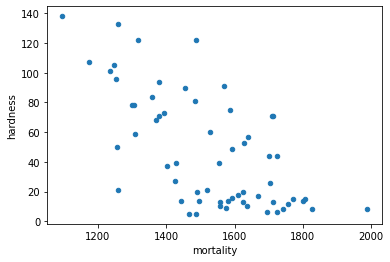

In [ ]:
#точечный график
df.plot(kind='scatter', x='mortality',y='hardness' )

In [ ]:
# коэффициент корреляции Пирсона
df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# коэффициент корреляции  Спирмена
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
train, test = train_test_split(df, random_state=42, test_size = 0.3)

In [ ]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [ ]:
 #модель линейной регрессии
from sklearn.linear_model import LinearRegression

In [ ]:
model =  LinearRegression()

In [ ]:
X=['mortality']
y=['hardness']

In [ ]:
model.fit(train[X], train[y])

LinearRegression()

In [ ]:
model.coef_

array([[-0.18112812]])

In [ ]:
model.intercept_

array([324.11907462])

In [ ]:
y_pred=model.predict(test[X])

In [ ]:
 # коэффициент детерминации
model.score(test[X], test[y])

-0.05226615794483802

In [ ]:
import matplotlib.pyplot as plt


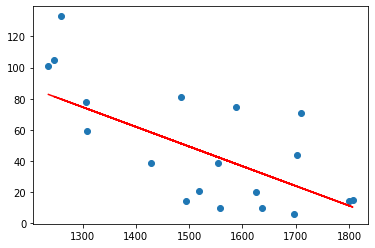

In [ ]:
# график остатков
plt.scatter(test[X], test[y])
plt.plot(test[X], y_pred, c='r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1496d2f90>]],
      dtype=object)

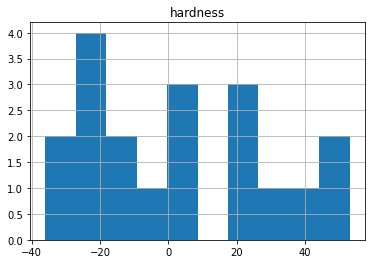

In [ ]:
#анализ остатков
(test[y]-y_pred).hist()

In [ ]:
#Задание 1.
#Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
#  связь между смертностью и жескостью воды есть - обратно-пропорциональная

In [ ]:
South = df[df['location']=='South']

In [ ]:
North = df[df['location']=='North']

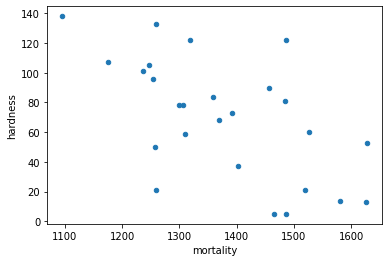

In [ ]:
#точечный график
South.plot(kind='scatter', x='mortality',y='hardness' )

In [ ]:
# коэффициент корреляции Пирсона
South.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
train, test = train_test_split(South, random_state=42, test_size = 0.3)

In [ ]:
X=['mortality']
y=['hardness']

In [ ]:
model.fit(train[X], train[y])

LinearRegression()

In [ ]:
y_pred=model.predict(test[X])

In [ ]:
 # коэффициент детерминации очень низкий
model.score(test[X], test[y])

-0.05226615794483802

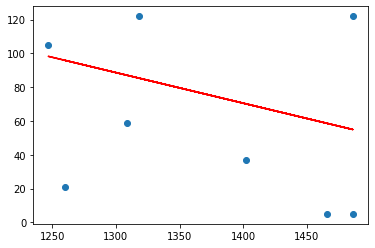

In [ ]:

plt.scatter(test[X], test[y])
plt.plot(test[X], y_pred, c='r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff148a11d10>]],
      dtype=object)

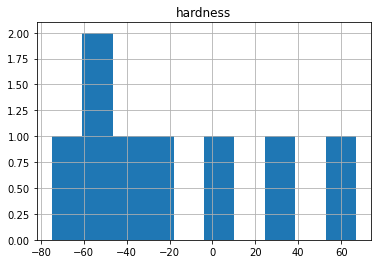

In [ ]:
#анализ остатков - остакки распределены "плохо"
(test[y]-y_pred).hist()

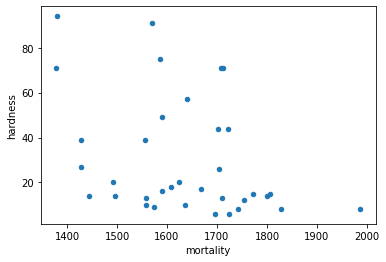

In [ ]:
#точечный график
North.plot(kind='scatter', x='mortality',y='hardness' )

In [ ]:
North.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
train, test = train_test_split(North, random_state=42, test_size = 0.3)

In [ ]:
model.fit(train[X], train[y])

LinearRegression()

In [ ]:
y_pred=model.predict(test[X])

In [ ]:
 # коэффициент детерминации
model.score(test[X], test[y])

-0.34863672627416764

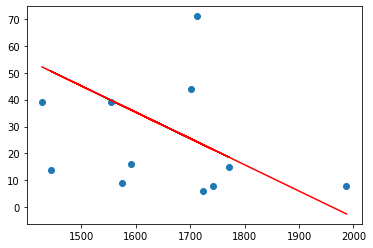

In [ ]:
# график остатков
plt.scatter(test[X], test[y])
plt.plot(test[X], y_pred, c='r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff148b4ef50>]],
      dtype=object)

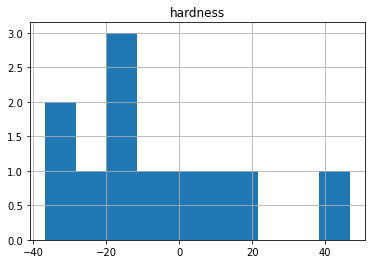

In [ ]:
#анализ остатков - модель показывает более плохие результаты, чем первоначальная модель, зависимость в Северном регионе не такая сильная
(test[y]-y_pred).hist()